In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [12]:
#ap = argparse.ArgumentParser()
#3               help="/home/toshitt")

#args = vars(ap.parse_args())

print("[INFO] loading cifar dataset")
((trainX,trainY),(testX,testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainX.shape[0])

[INFO] loading cifar dataset
50000


In [13]:
print(trainX.shape)

(50000, 32, 32, 3)


In [0]:
trainX = trainX.reshape((trainX.shape[0],3072))
testX = testX.reshape((testX.shape[0],3072))

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY  = lb.fit_transform(testY)

labelNames = ["airplane","automobile","bird","cat","deer",
              "dog","frog","horse","ship","truck"]

In [0]:
model=Sequential()

model.add(Dense(1024,input_shape=(3072,),activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [18]:
print("[INFO] training network .. .. ")

sgd = SGD(0.01)

model.compile(loss="categorical_crossentropy",optimizer=sgd,
              metrics=["accuracy"])

H = model.fit(trainX,trainY,validation_data=(testX,testY),
              epochs=100,batch_size=32)



[INFO] training network .. .. 
Epoch 1/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8362 - accuracy: 0.3435 - val_loss: 1.6895 - val_accuracy: 0.4070
Epoch 2/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6474 - accuracy: 0.4185 - val_loss: 1.6428 - val_accuracy: 0.4109
Epoch 3/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5649 - accuracy: 0.4484 - val_loss: 1.5403 - val_accuracy: 0.4613
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5082 - accuracy: 0.4672 - val_loss: 1.5049 - val_accuracy: 0.4616
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4598 - accuracy: 0.4845 - val_loss: 1.4695 - val_accuracy: 0.4727
Epoch 6/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4177 - accuracy: 0.4982 - val_loss: 1.4533 - val_accuracy: 0.4853
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3825 - accuracy: 0.5

In [23]:
print("[INFO] evaluating network ... ")
predictions = model.predict(testX,batch_size=32)
print(classification_report(testY.argmax(axis=1),
                               predictions.argmax(axis=1),target_names=labelNames  ))

[INFO] evaluating network ... 
              precision    recall  f1-score   support

    airplane       0.63      0.66      0.64      1000
  automobile       0.68      0.67      0.67      1000
        bird       0.48      0.45      0.47      1000
         cat       0.40      0.43      0.42      1000
        deer       0.50      0.49      0.50      1000
         dog       0.47      0.47      0.47      1000
        frog       0.64      0.63      0.64      1000
       horse       0.62      0.62      0.62      1000
        ship       0.67      0.72      0.69      1000
       truck       0.64      0.59      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



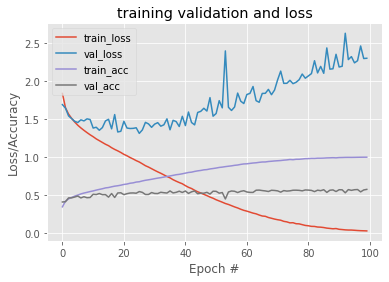

In [26]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,100),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,100),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,100),H.history["val_accuracy"],label="val_acc")
plt.title("training validation and loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()